In [1]:

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("imdb_movies.csv")

In [18]:
df.dropna(inplace=True)

In [19]:

df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [20]:
numerical_columns = []
categorical_columns = []
for column in df.columns:
    if df[column].dtype == 'object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

In [21]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_columns),
    ("cat", OneHotEncoder(), categorical_columns)
])

In [22]:
X = preprocessor.fit_transform(df)

In [25]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    diff = inertias[-2] - inertias[-1] if k > 1 else 0
    print(f'K={k}, Inercia = {kmeans.inertia_:,.6f} - Diferencia = {diff:,.6f}')

K=1, Inercia = 101,896.025269 - Diferencia = 0.000000
K=2, Inercia = 88,379.431466 - Diferencia = 13,516.593802
K=3, Inercia = 86,034.350339 - Diferencia = 2,345.081127
K=4, Inercia = 80,954.517909 - Diferencia = 5,079.832430
K=5, Inercia = 79,704.705078 - Diferencia = 1,249.812831
K=6, Inercia = 77,808.517707 - Diferencia = 1,896.187370
K=7, Inercia = 76,639.153171 - Diferencia = 1,169.364536
K=8, Inercia = 75,596.765696 - Diferencia = 1,042.387475
K=9, Inercia = 74,762.554134 - Diferencia = 834.211563
K=10, Inercia = 74,485.971958 - Diferencia = 276.582175


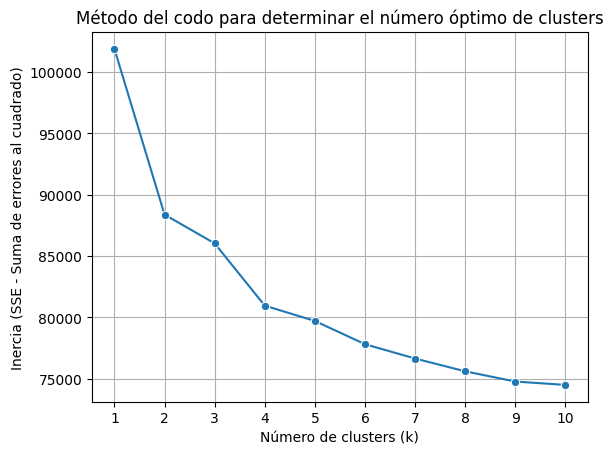

In [26]:
sns.lineplot(x=range(1, 11), y=inertias, marker="o")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia (SSE - Suma de errores al cuadrado)")
plt.title("Método del codo para determinar el número óptimo de clusters")
plt.xticks(range(1, 11))
plt.grid()
plt.show()

In [27]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
df["Cluster"] = kmeans.labels_
df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,Cluster
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,3
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,0
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,0
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,2
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US,0


In [28]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

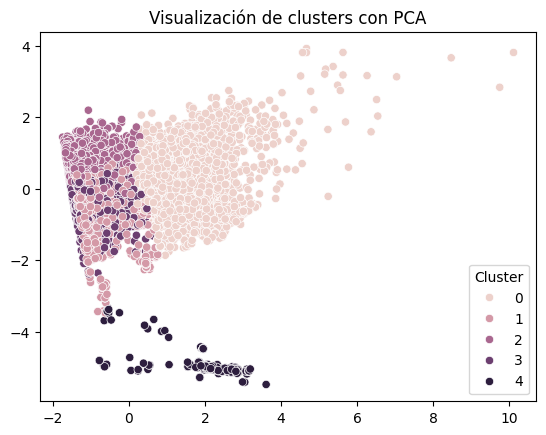

In [29]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["Cluster"])
plt.title("Visualización de clusters con PCA")
plt.show()

In [30]:
df["Cluster"].value_counts()

Cluster
0    3721
3    2420
2    2008
1    1694
4     209
Name: count, dtype: int64

In [31]:

df[numerical_columns + ["Cluster"]].groupby("Cluster").mean()

,score,budget_x,revenue
Cluster,,,
0,65.060468,1.181563e+08,5.408668e+08
1,59.293388,2.121851e+07,6.072805e+07
2,73.757470,1.960504e+07,7.303717e+07
3,62.106612,3.852121e+07,9.742570e+07
4,3.124402,1.741400e+08,1.303563e+08


In [32]:
df[categorical_columns + ["Cluster"]].groupby("Cluster").agg(lambda x: x.mode()[0])

,names,date_x,genre,overview,crew,orig_title,status,orig_lang,country
Cluster,,,,,,,,,
0,Godzilla,10/01/2021,Drama,We don't have an overview translated in Englis...,"Aaron Taylor-Johnson, Ford Brody, Elizabeth Ol...",Godzilla,Released,English,US
1,Carrie,10/27/2017,Drama,Roberto Benigni adapts the classic children's ...,"Roberto Benigni, Pinocchio, Nicoletta Braschi,...",Carrie,Released,English,US
2,Pinocchio,01/01/2020,Drama,Fifteen years after murdering his sister on Ha...,"Dickie Jones, Pinocchio / Alexander (voice) (u...",Pinocchio,Released,English,AU
3,Halloween,04/09/1998,Comedy,A wooden puppet embarks on a thrilling adventu...,"Benjamin Evan Ainsworth, Pinocchio (voice), To...",Halloween,Released,English,AU
4,Life,04/06/2023,Romance,We don't have an overview translated in Englis...,"Miray Daner, Hicran, Burak Dakak, Rıza, Umut K...",Hayat,Released,English,US


<Axes: xlabel='Cluster', ylabel='revenue'>

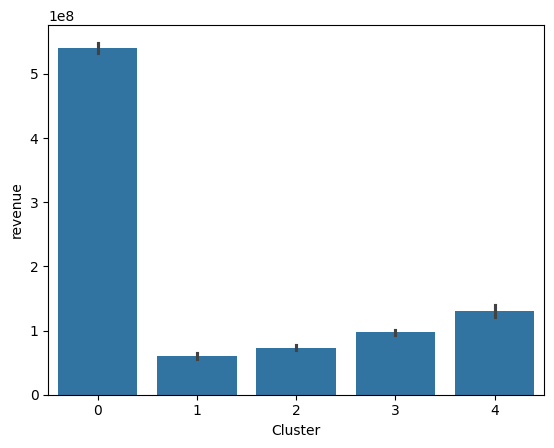

In [33]:
sns.barplot(df, x="Cluster", y="revenue", estimator="mean")

<Axes: xlabel='budget_x', ylabel='revenue'>

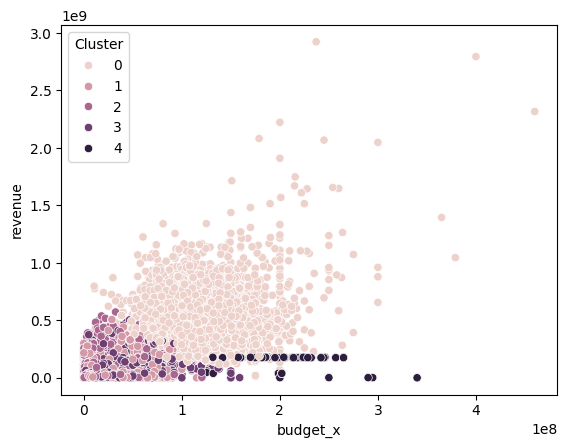

In [35]:

sns.scatterplot(df, x="budget_x", y="revenue", hue="Cluster")